In [1]:
######## Importing the necessary libraries #########


import pandas as pd
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from astropy.constants import c, k_B,R_earth


%matplotlib inline   

In [2]:
R_E=R_earth.to('km').value

In [3]:
##### Fetching the cleaned FM transmitter data for the countries: CANADA, AUSTRALIA ,GERMANY,USA and SOUTH AFRICA ####
#####  EIRP in Watts #####
##### Latitude ranges from 90(N.Pole) to 0 (EQUATOR) to -90(S.Pole) ########
##### Longitude ranges between 0 and 360 degree eastwards ############


#Reading the CSV file
df=pd.read_csv("/home/ghoshsonia/rfi_RRI/Final_Revised.csv")

#Removing the Null/missing values in the CSV file
df.dropna(subset = ["Latitude in degrees"], inplace=True)


#df.set_index("Area Served", inplace = True) # Set 'Area Served' column as index on a Dataframe
#df=df.loc[["Perth", "Perth City"]] # Using the operator .loc[] to select multiple rows from the Dataframe
df

,Latitude in degrees,Longitude in degrees,Frequency(MHz),EIRP
0,50.947181,8.532986,87.6,164000.0
1,53.509289,10.093932,87.6,131200.0
2,49.832397,9.592726,87.6,41000.0
3,49.629033,7.820645,87.6,820.0
4,49.681928,7.327415,87.6,328.0
...,...,...,...,...
15644,52.294536,181.946878,104.6,100.0
15645,52.115714,182.330147,104.4,1000.0
15646,52.892406,180.655972,104.0,50.0
15647,53.335814,180.171983,104.7,3000.0


In [4]:
###### User defined frequency axis ######################


def get_non_negative_int(prompt):
    while True:
        try:
            value = float(input(prompt))
        except ValueError:
            print("There is an error in the input.")
            continue

        if value<=0:
            print("There is an error in the input.The input cannot be zero or negative")
       # elif value<0:
        #    print("The input must not be negative.")
            continue
        else:
            break
    return value

fstart = get_non_negative_int("Please enter the minimum value of the frequency range: ")
fstop = get_non_negative_int("Please enter the maximum value of the frequency range: ")
fres=get_non_negative_int("Please enter the resolution of the frequency: ")


Please enter the minimum value of the frequency range: 56
Please enter the maximum value of the frequency range: 109
Please enter the resolution of the frequency: 0.9765625


In [91]:
freq_rfi=np.arange(fstart,fstop,fres)
%store freq_rfi
#### Array consisting of frequencies from the dataset
data_freq=df['Frequency(MHz)'].values



diff=np.zeros((len(data_freq),len(freq_rfi)),dtype=object)
freq_arr=np.zeros(len(data_freq))


for i in range(len(data_freq)):
    for j in range(len(freq_rfi)):
        diff[i][j]=abs(data_freq[i]-freq_rfi[j])
        freq_arr[i]=freq_rfi[np.argmin(diff[i])]

Stored 'freq_rfi' (ndarray)


In [93]:
freq_rfi

array([ 56.       ,  56.9765625,  57.953125 ,  58.9296875,  59.90625  ,
        60.8828125,  61.859375 ,  62.8359375,  63.8125   ,  64.7890625,
        65.765625 ,  66.7421875,  67.71875  ,  68.6953125,  69.671875 ,
        70.6484375,  71.625    ,  72.6015625,  73.578125 ,  74.5546875,
        75.53125  ,  76.5078125,  77.484375 ,  78.4609375,  79.4375   ,
        80.4140625,  81.390625 ,  82.3671875,  83.34375  ,  84.3203125,
        85.296875 ,  86.2734375,  87.25     ,  88.2265625,  89.203125 ,
        90.1796875,  91.15625  ,  92.1328125,  93.109375 ,  94.0859375,
        95.0625   ,  96.0390625,  97.015625 ,  97.9921875,  98.96875  ,
        99.9453125, 100.921875 , 101.8984375, 102.875    , 103.8515625,
       104.828125 , 105.8046875, 106.78125  , 107.7578125, 108.734375 ])

# freq

In [92]:
df['New Frequency']=freq_arr
df

,Latitude in degrees,Longitude in degrees,Frequency(MHz),EIRP,New Frequency,Pixel_number
0,50.947181,8.532986,87.6,164000.0,87.250000,313
1,53.509289,10.093932,87.6,131200.0,87.250000,265
2,49.832397,9.592726,87.6,41000.0,87.250000,365
3,49.629033,7.820645,87.6,820.0,87.250000,365
4,49.681928,7.327415,87.6,328.0,87.250000,365
...,...,...,...,...,...,...
15644,52.294536,181.946878,104.6,100.0,104.828125,338
15645,52.115714,182.330147,104.4,1000.0,104.828125,338
15646,52.892406,180.655972,104.0,50.0,103.851562,338
15647,53.335814,180.171983,104.7,3000.0,104.828125,338


In [7]:
#Resolution of the map
print('-----------Resolution of the map---------') 
nside = 16
print(f"The number of pixels for the given NSIDE: {(hp.nside2npix(nside))}")
print(f"Approximate resolution in degrees for given nside {np.degrees(hp.nside2resol(nside)):.2f}")
print( "Pixel area: %.2f square degrees" % hp.nside2pixarea(nside, degrees=True))



-----------Resolution of the map---------
The number of pixels for the given NSIDE: 3072
Approximate resolution in degrees for given nside 3.66
Pixel area: 13.43 square degrees


In [8]:

######-------------------Allocating Pixel number to the Latitude and Longitude of each Tx in the CSV---------#######



# Healpy pixel number when input angles are assumed to be longitude and latitude in degrees
pixel_indices = hp.ang2pix(nside, df['Longitude in degrees'].to_numpy() ,df['Latitude in degrees'].to_numpy(),lonlat=True)
df['Pixel_number']=pixel_indices 
print(pixel_indices)

df

[313 265 365 ... 338 338 338]


/home/ghoshsonia/.local/lib/python3.8/site-packages/healpy/pixelfunc.py:482: RuntimeWarning: invalid value encountered in _ang2pix_ring
  return pixlib._ang2pix_ring(nside, theta, phi)


,Latitude in degrees,Longitude in degrees,Frequency(MHz),EIRP,New Frequency,Pixel_number
0,50.947181,8.532986,87.6,164000.0,87.250000,313
1,53.509289,10.093932,87.6,131200.0,87.250000,265
2,49.832397,9.592726,87.6,41000.0,87.250000,365
3,49.629033,7.820645,87.6,820.0,87.250000,365
4,49.681928,7.327415,87.6,328.0,87.250000,365
...,...,...,...,...,...,...
15644,52.294536,181.946878,104.6,100.0,104.828125,338
15645,52.115714,182.330147,104.4,1000.0,104.828125,338
15646,52.892406,180.655972,104.0,50.0,103.851562,338
15647,53.335814,180.171983,104.7,3000.0,104.828125,338


In [84]:
pixel_indices = hp.ang2pix(nside,133.7751,-25.2744 ,lonlat=True)


pixel_indices




2167

In [9]:
#######---------------Conversion of the pixel numbers w.r.t the given NSIDE to corresponding angular coordinates--------#######


NPIX = hp.nside2npix(nside) # Storing the number of pixels of the map corresponding to the given NSIDE
arr=np.arange(NPIX) #Create an an array of pixel numbers with respect to the NSIDE

phi,theta = (hp.pix2ang(nside, ipix=arr,lonlat=True)) # Array of the angular coordinates co-latitude(theta) 
                                                        #and longitude(phi) in degrees 
                                                       # With respect to the given NSIDE


In [10]:
#######------------------Altitudes of the satellite orbit--------####


#Creating user defined data points between 400 km to 36000 km in log scale
data_point=int(input("Enter number of data points : "))
altitude= np.logspace(np.log10(400),np.log10(36000),data_point) 
print(altitude)


Enter number of data points : 2
[  400. 36000.]


In [11]:
#Calculation of Elevation angle

x=np.zeros((NPIX,NPIX))
y=np.zeros((NPIX,NPIX))
elev_ang=np.zeros((len(altitude),NPIX,NPIX))
#R_E=6400
for k in range(len(altitude)):
    for i in range(len(theta)):
        for j in range(len(theta)):
        
            x[i,j]=((np.cos(np.radians(theta[i])))*(np.cos(np.radians(theta[j])))*(np.cos(np.radians(phi[j]-phi[i])))+(np.sin(np.radians(theta[i])))*(np.sin(np.radians(theta[j]))))
            y[i,j]=(np.arccos(x[i,j]))
            B=(altitude[k]+R_E)/R_E
            elev_ang[k,i,j]=-(np.degrees(np.arctan((B-np.cos(np.radians(y[i,j])))/np.sin(np.radians(y[i,j]))))-y[i,j])

<ipython-input-11-12ba9066e5ac>:12: RuntimeWarning: divide by zero encountered in double_scalars
  elev_ang[k,i,j]=-(np.degrees(np.arctan((B-np.cos(np.radians(y[i,j])))/np.sin(np.radians(y[i,j]))))-y[i,j])
<ipython-input-11-12ba9066e5ac>:10: RuntimeWarning: invalid value encountered in arccos
  y[i,j]=(np.arccos(x[i,j]))


In [70]:
%store elev_ang

Stored 'elev_ang' (ndarray)


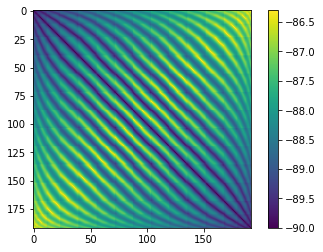

In [428]:
plt.imshow(np.resize(elev_ang,(NPIX,NPIX))) # 400km # with phi=100
plt.colorbar()

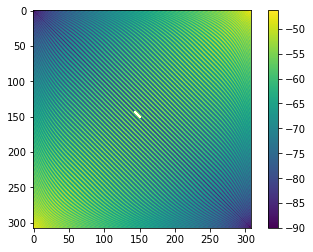

In [42]:
plt.imshow(np.resize(ang,(308,308)))# 400km # with VARYING phi
plt.colorbar()

In [106]:
df_el.iloc[0]
pixel_ind2 = np.where(df_el.iloc[0]<0)
print(pixel_ind2)

(array([   0,    1,    2, ..., 1580, 1581, 1582]),)


In [60]:
# Function for Radiation pattern of the satellite antenna beam #
#beam_pattern=np.zeros((len(altitude),NPIX,NPIX))
beam = lambda theta, phi:(np.cos(np.radians(theta)))**2                              # (np.sin(np.radians(theta)))**2

In [61]:
# Assuming the satellite antenna beam to be symmetric across azimuth #
# Calculation of the beam pattern #

az=0
beam_pattern = beam(elev_ang,az)
#beam_pattern =np.resize(beam_pattern,(np.size(theta),np.size(theta)))

In [62]:
%store beam_pattern

Stored 'beam_pattern' (ndarray)


In [427]:
df22221 = pd.DataFrame(beam_pattern) # 400km # with healpy phi
df22221

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,3.749399e-33,3.508762e-05,7.066949e-05,3.508762e-05,2.330930e-05,0.000023,0.000061,0.000115,0.000155,0.000155,...,0.002895,0.003218,0.003565,0.003565,0.003218,2.895013e-03,3.151431e-03,3.435825e-03,4.163635e-03,3.435825e-03
1,3.508762e-05,3.749399e-33,3.508762e-05,7.066949e-05,1.154081e-04,0.000061,0.000023,0.000023,0.000061,0.000115,...,0.002716,0.002716,0.002895,0.003218,0.003565,3.565187e-03,3.435825e-03,3.151431e-03,3.435825e-03,4.163635e-03
2,7.066949e-05,3.508762e-05,3.749399e-33,3.508762e-05,1.545730e-04,0.000155,0.000115,0.000061,0.000023,0.000023,...,0.003218,0.002895,0.002716,0.002716,0.002895,3.218251e-03,4.163635e-03,3.435825e-03,3.151431e-03,3.435825e-03
3,3.508762e-05,7.066949e-05,3.508762e-05,3.749399e-33,6.104933e-05,0.000115,0.000155,0.000155,0.000115,0.000061,...,0.003565,0.003565,0.003218,0.002895,0.002716,2.716291e-03,3.435825e-03,4.163635e-03,3.435825e-03,3.151431e-03
4,2.330930e-05,1.154081e-04,1.545730e-04,6.104933e-05,9.382577e-20,0.000040,0.000139,0.000242,0.000286,0.000242,...,0.002785,0.003390,0.004164,0.003390,0.002785,2.401782e-03,2.716291e-03,3.218251e-03,3.565187e-03,2.895013e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2.895013e-03,3.565187e-03,3.218251e-03,2.716291e-03,2.401782e-03,0.002785,0.003390,0.004164,0.003390,0.002785,...,0.000242,0.000286,0.000242,0.000139,0.000040,3.749399e-33,6.104933e-05,1.545730e-04,1.154081e-04,2.330930e-05
188,3.151431e-03,3.435825e-03,4.163635e-03,3.435825e-03,2.716291e-03,0.002716,0.002895,0.003218,0.003565,0.003565,...,0.000061,0.000115,0.000155,0.000155,0.000115,6.104933e-05,3.749399e-33,3.508762e-05,7.066949e-05,3.508762e-05
189,3.435825e-03,3.151431e-03,3.435825e-03,4.163635e-03,3.218251e-03,0.002895,0.002716,0.002716,0.002895,0.003218,...,0.000023,0.000023,0.000061,0.000115,0.000155,1.545730e-04,3.508762e-05,3.749399e-33,3.508762e-05,7.066949e-05
190,4.163635e-03,3.435825e-03,3.151431e-03,3.435825e-03,3.565187e-03,0.003565,0.003218,0.002895,0.002716,0.002716,...,0.000115,0.000061,0.000023,0.000023,0.000061,1.154081e-04,7.066949e-05,3.508762e-05,3.749399e-33,3.508762e-05


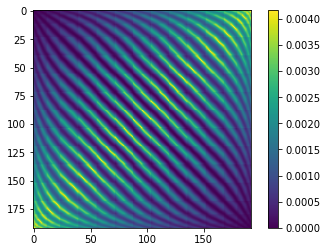

In [426]:
# Verify
plt.imshow(beam_pattern)
plt.colorbar()

In [18]:
###########----------------- Calculation of Field of view of the satellite---------#######
###########-----------------Considering Nadir-pointing Field of View Geometry-------######
##########-----------------Considering the FOV of the satellite to be tangent to the surface of the Earth------######


FOV=np.zeros(len(altitude))
for i in range(0,len(altitude)):
# Consider a case of full coverage under elevation of 0 º
    #Rad= 6371 # Mean radius of Earth in km
    FOV[i]= 2*np.arcsin(R_E/(R_E+ altitude[i]))  # Field of view for maximal coverage in radians when elevation is 0 º 
    print(" The Field of view of the satellite at a height of",altitude[i],"km is",FOV[i], "radians")

 The Field of view of the satellite at a height of 400.0000000000001 km is 2.4510662859463395 radians
 The Field of view of the satellite at a height of 35999.99999999996 km is 0.3021573821256571 radians


In [19]:
###########----------------- Calculation of the radius of the FOV of the satellite---------#######



# The surface of the coverage area of the Earth depends on the central angle
Central_angle=np.zeros(len(altitude))
for i in range(0,len(altitude)):
    Central_angle[i]=np.arccos(R_E/(R_E+altitude[i])) # Central angle in radians
    
    Dia_of_FOV=2*Central_angle*R_E  # Diameter of the FOV (disc on the Earth's surface)in km
    Rad_of_FOV= Dia_of_FOV/2 # Radius of the FOV in km
    Rad_of_FOV=Rad_of_FOV/R_E  # Radius of the FOV in Radians
    print(" The Radius of the Field of View for a height of",altitude[i],"km in radians is",Rad_of_FOV[i])
len(Rad_of_FOV)

 The Radius of the Field of View for a height of 400.0000000000001 km in radians is 0.34526318382172694
 The Radius of the Field of View for a height of 35999.99999999996 km in radians is 1.419717635732068


2

In [144]:
90-np.degrees(Central_angle[0]) # Max observable latitude at 400km

70.20740346885583

In [149]:
90-np.degrees(FOV[0]) # Elevation angle w.r.t geometric FOV

-50.41480693771166

In [20]:
###############-----Storing indices of the pixel number that are inside the circle/disc(FOV) wrt the altitude-----------######


vec1 = hp.ang2vec(phi,theta,lonlat=True) #Using ang2vec convert angles that is co-latitude and longitude in radians
                                        #to 3D position vector
    
disc=np.zeros((len(arr),len(Rad_of_FOV)),dtype=object)#Array of indices of the pixel number that are inside the 
                                                      #circle/disc specified by vec and radius
def pixel_disc(a,b):
    for i in range(len(a)):
        for j in range(len(b)):
            disc[j][i]=hp.query_disc(nside, vec1[j], radius=a[i])
pixel_disc(Rad_of_FOV,arr)

In [17]:
#########------- Cross checking the array being created-----#########

df1 = pd.DataFrame(disc)
df1

,0
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
...,...
3067,"[2928, 2929, 2954, 2955, 2956, 2957, 2958, 295..."
3068,"[2960, 2961, 2962, 2963, 2964, 2965, 2966, 296..."
3069,"[2965, 2966, 2967, 2968, 2969, 2970, 2971, 297..."
3070,"[2972, 2973, 2974, 2975, 2976, 2977, 2978, 297..."


In [21]:
######-----Storing indices of the pixel number that are common between the FOV disc and the satellite pixel no------####


Comm_pix=np.zeros((len(disc[:,i]),len(Rad_of_FOV)),dtype=object)

for i in range(len(Rad_of_FOV)):
    for k in range(len(disc[:,i])):
     

         Comm_pix[k][i]=np.intersect1d(pixel_indices,disc[k][i])#Array of indices of the pixel number that are
                                                           #common between the FOV disc and the satellite pixel no
         
        

In [48]:
#########------- Cross checking the array being created-----#########


df2 = pd.DataFrame(Comm_pix)
df2

,0
0,[]
1,[2]
2,"[2, 8, 9]"
3,"[2, 10]"
4,[12]
...,...
187,[]
188,[]
189,[]
190,[]


In [22]:
######-----Storing indices of the pixel number that are common between the FOV disc and the satellite pixel no ------#
######-----And the same pixel number of the transmitters-----##



######--- Initializing the array to store the pixel number that are common between the FOV disc ---####
######                        and the satellite pixel no    ######
Comm_TX=np.zeros((len(Comm_pix),len(Rad_of_FOV)),dtype=object)
found_common=np.zeros(( len(Comm_pix),len(Rad_of_FOV)),dtype=object)

for j in range(len(Rad_of_FOV)):
    for i in range(len(Comm_pix)):
        
        Comm_TX[i][j]=set(Comm_pix[i][j])
        found_common[i][j] = [l for l in pixel_indices if l in Comm_TX[i][j]]#Array of indices of the pixel number that 
                                            #are common between the FOV disc and the satellite pixel no with
                                                    # Tx having same pixel number
                                                                       
         

In [23]:
#########------- Cross checking the array being created-----#########

df3 = pd.DataFrame(found_common)
df3

,0,1
0,"[78, 78, 54, 78]","[313, 265, 365, 365, 365, 312, 365, 365, 365, ..."
1,"[54, 99]","[313, 265, 365, 365, 365, 312, 365, 365, 365, ..."
2,"[101, 101, 101, 101, 102, 101, 101, 101, 102, ...","[313, 265, 365, 365, 365, 312, 365, 365, 365, ..."
3,"[78, 103, 103, 103, 106, 105, 78, 54, 104, 104...","[313, 265, 365, 365, 365, 312, 365, 365, 365, ..."
4,[54],"[313, 265, 365, 365, 365, 312, 365, 365, 365, ..."
...,...,...
3067,[],"[2490, 1746, 2490, 2424, 2424, 2424, 2424, 242..."
3068,[],"[2490, 2490, 2424, 2424, 2424, 2424, 2424, 242..."
3069,[],"[2490, 2490, 2424, 2424, 2424, 2424, 2424, 242..."
3070,[],"[2490, 1746, 2490, 2424, 2424, 2424, 2424, 242..."


In [36]:
#######-------Store the values of the received power in Watt,dBm and Kelvin wrt altitude----#####
######------- Calculation of the received power using Friis Transmission Equation--------#######
######-------Considering isotropic transmitter and receiver with gain =1 -------------#########





#res=fres*1e6 #Bandwidth
res=200*1e3
Rx_Power= np.zeros((len(df),len(altitude)))
Rx_Power_in_Kelvin=np.zeros((len(df),len(altitude)))
Rx_Power_in_dBm=np.zeros((len(df),len(altitude)))
for i in range(0,len(altitude)):
    for j in range(0,len(df)):
        wavelength= c.value/(df.iloc[j]['Frequency(MHz)']*1e6)
        Rx_Power[j][i]= ((df.iloc[j]['EIRP'])*(wavelength)**2)/(4*np.pi*altitude[i]*1e3)**2 #the Friis Transmission Equation
        Rx_Power_in_dBm[j][i]= 10.*np.log10( Rx_Power[j][i])+30
        Rx_Power_in_Kelvin[j][i]=Rx_Power[j][i]/(k_B.value*res)#in Kelvin
        

       

<ipython-input-36-9abc4f6e0f1f>:18: RuntimeWarning: divide by zero encountered in log10
  Rx_Power_in_dBm[j][i]= 10.*np.log10( Rx_Power[j][i])+30


In [82]:
df_data_W=pd.DataFrame(Rx_Power)
df_data_W

,0,1,2
0,7.602166e-08,8.446851e-10,9.385390e-12
1,6.081733e-08,6.757481e-10,7.508312e-12
2,1.900541e-08,2.111713e-10,2.346347e-12
3,3.801083e-10,4.223425e-12,4.692695e-14
4,1.520433e-10,1.689370e-12,1.877078e-14
...,...,...,...
14698,4.197282e-09,4.663646e-11,5.181829e-13
14699,7.755847e-10,8.617607e-12,9.575119e-14
14700,7.755847e-10,8.617607e-12,9.575119e-14
14701,2.098641e-09,2.331823e-11,2.590915e-13


In [22]:

df_data_db=pd.DataFrame(Rx_Power_in_dBm)
df_data_db['Pixel_number']=pixel_indices
df_data_db['New Frequency']=freq_arr
df_data_db


,0,Pixel_number,New Frequency
0,-64.712452,12,87.5
1,-65.681552,12,87.5
2,-70.733052,24,87.5
3,-87.722752,24,87.5
4,-91.702152,24,87.5
...,...,...,...
14698,-77.292144,36,88.5
14699,-84.625533,36,88.5
14700,-84.625533,36,88.5
14701,-80.302444,36,88.5


In [37]:
##### ---Create dataframe to store the values of the received power in Kelvin w.r.t the altitude----#####

##### The first three columns of the dataframe indicate the altitude [0=400 km, 1= 3794 km , 2= 36000 km ] #####
##### The column will vary with the user input for the number of altitudes ######

df_data=pd.DataFrame(Rx_Power_in_Kelvin)

df_data['Pixel_number']=pixel_indices
df_data['New Frequency']=freq_arr


df_data

,0,1,Pixel_number,New Frequency
0,2.753113e+10,3.398905e+06,313,87.250000
1,2.202490e+10,2.719124e+06,265,87.250000
2,6.882783e+09,8.497263e+05,365,87.250000
3,1.376557e+08,1.699453e+04,365,87.250000
4,5.506226e+07,6.797810e+03,365,87.250000
...,...,...,...,...
14732,1.177403e+07,1.453584e+03,338,104.828125
14733,1.181918e+08,1.459158e+04,338,104.828125
14734,5.955137e+06,7.352021e+02,338,103.851562
14735,3.525464e+08,4.352425e+04,338,104.828125


In [86]:
#########  Create dataframes for the FOV for each pixel position of the satellite at different altitudes #######



######--- Initializing the array to store the dataframes for the FOV for each pixel position of the satellite #####
######            at different altitudes   ######


df_1=np.zeros((len(found_common),len(Rad_of_FOV)),dtype=object)

for j in range(len(Rad_of_FOV)):
    for i in range(len(found_common)):
        df_1[i][j]= df_data.loc[df_data['Pixel_number'].isin(found_common[i][j])]
        #df_1[i][j][j]=df_1[i][j][j]*beam_pattern[j,i,found_common[i,j]]
        df_1[i][j]= df_1[i][j].groupby(['New Frequency']).sum()  # df9['Pixel_number']= Column consisting of 
        df_1[i][j]= df_1[i][j].reset_index() 
        
       
#df_1.drop['Pixel_number']

In [87]:
## Initializing the 3D array to store the received power for each pixel, each frequency and at different altitudes ###

power_output=np.zeros((len(Rad_of_FOV),NPIX,len(freq)),dtype=object)


In [96]:
## Create the 3D array to store the received power for each pixel, each frequency and at different altitudes ##
## k: loops along the length of the number of altitude
## m: loops along the length of the number of pixels based on the given NSIDE
## l: loops along the length of the number of frequencies in the frequency axis defined by user



for k in range(len(Rad_of_FOV)):
    for m in range(NPIX):    
        for l in range(len(freq)):
            if (df_1[m][k][k][df_1[m][k]['New Frequency'] == freq[l]].values).size==0:# checking for empty dataframes
                power_output[k][m][l]=0
            else: 
                power_output[k][m][l]=float(df_1[m][k][k][df_1[m][k]['New Frequency'] == freq[l]].values)
           
        

In [68]:
beam_rfi=beam_pattern[0,313,:]
beam_rfi

array([0.03411121, 0.04190658, 0.04333624, ..., 0.35948126, 0.36207097,
       0.34840294])

In [97]:
%store power_output

Stored 'power_output' (ndarray)


In [37]:
pix = hp.ang2pix(nside,133.77,-25.27,lonlat=True)
pix

2167

In [94]:
power_output[1,686,:]

array([9817216.833535127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 100550.04092478887, 0, 601231.9185034827,
       933358.4989940901, 3716743.7614680408, 1371504.264812168,
       1782390.319553567, 960.3302010962886, 465538.7884412728,
       900384.7579379252, 0, 12837852.489687376, 53215169.946162924,
       31703035.017883565, 43569362.24319531, 39838905.20188442,
       43732913.225988135, 43680424.806180604, 45210946.199012324,
       34965697.65210654, 39270333.77963238, 36168094.23755195,
       32504432.2175711, 35400150.20447381, 43673497.87957166,
       39712446.56762542, 35608064.64072543, 34977022.86368796,
       35253894.3569014, 25105285.975737635, 29007703.34361312,
       27147182.17426722, 13576095.31804337, 0], dtype=object)

In [48]:
power_output[0,arr!=313,:]=0


In [49]:
power_output[1,arr!=313,:]=0

In [38]:
hp.pix2ang(nside,2167,lonlat=True)

(132.1875, -24.62431835216408)

Text(0.5, 0.98, 'Power spectrum for GERMANY at an altitude of 400 km')

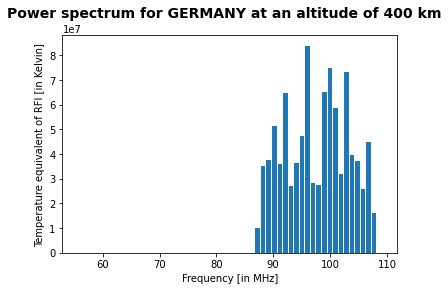

In [141]:
plt.bar(freq,power_output[0,313,:]) 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Temperature equivalent of RFI [in Kelvin]')
plt.suptitle('Power spectrum for GERMANY at an altitude of 400 km',fontsize=14, fontweight="bold")

Text(0.5, 0.98, 'Power spectrum for GERMANY at an altitude of 36000 km')

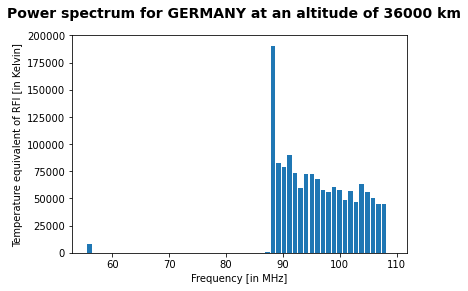

In [142]:
plt.bar(freq,power_output[1,313,:]) 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Temperature equivalent of RFI [in Kelvin]')
plt.suptitle('Power spectrum for GERMANY at an altitude of 36000 km',fontsize=14, fontweight="bold")

Text(0.5, 0.98, 'Power spectrum for HANLE at an altitude of 400 km')

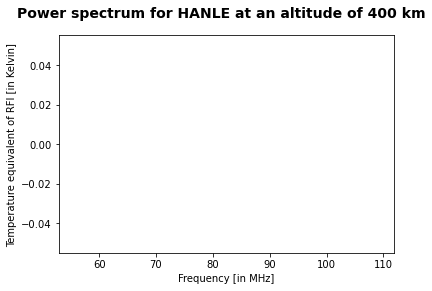

In [123]:
plt.bar(freq,power_output[0,686,:]) 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Temperature equivalent of RFI [in Kelvin]')
plt.suptitle('Power spectrum for HANLE at an altitude of 400 km',fontsize=14, fontweight="bold")

Text(0.5, 0.98, 'Power spectrum for HANLE at an altitude of 36000 km')

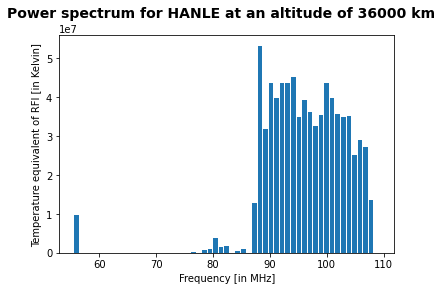

In [95]:
plt.bar(freq,power_output[1,686,:]) 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Temperature equivalent of RFI [in Kelvin]')
plt.suptitle('Power spectrum for HANLE at an altitude of 36000 km',fontsize=14, fontweight="bold")

Text(0.5, 0.98, 'Power spectrum for HANLE at an altitude of 36000 km')

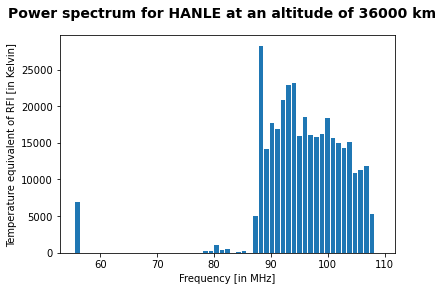

In [124]:
plt.bar(freq,power_output[1,686,:]) 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Temperature equivalent of RFI [in Kelvin]')
plt.suptitle('Power spectrum for HANLE at an altitude of 36000 km',fontsize=14, fontweight="bold")

Text(0.5, 0.98, 'Power spectrum for AUSTRALIA at an altitude of 36000 km')

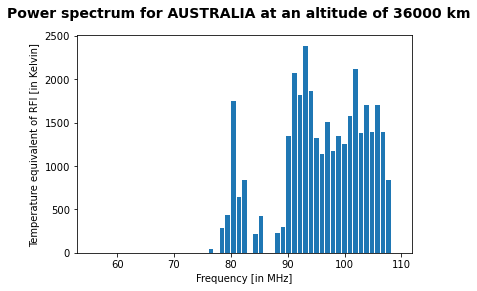

In [126]:

plt.bar(freq,power_output[1,2167,:]) 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Temperature equivalent of RFI [in Kelvin]')
plt.suptitle('Power spectrum for AUSTRALIA at an altitude of 36000 km',fontsize=14, fontweight="bold")

Text(0.5, 0.98, 'Power spectrum for AUSTRALIA at an altitude of 400 km')

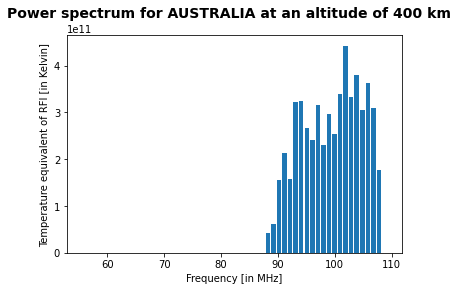

In [103]:
#power_output[0,2167,:]

plt.bar(freq,power_output[0,2167,:]) 
plt.xlabel('Frequency [in MHz]')
plt.ylabel('Temperature equivalent of RFI [in Kelvin]')
plt.suptitle('Power spectrum for AUSTRALIA at an altitude of 400 km',fontsize=14, fontweight="bold")

In [38]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 400 km at 90 MHz----------------------#######

test_plot = np.zeros(hp.nside2npix(nside))
test_plot[0:np.size(power_output[0,:,6])] = power_output[0,:,6]


In [36]:
freq[40]

95.0625

0.0 180.0 -180.0 180.0


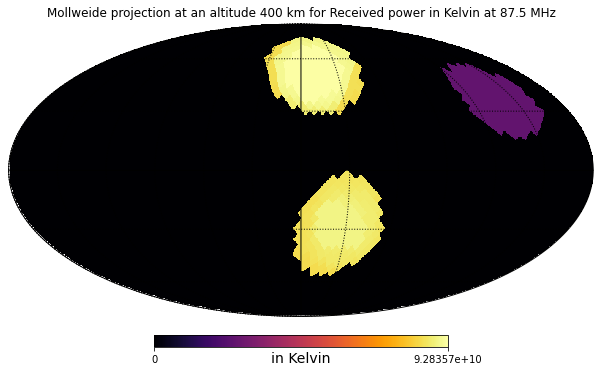

In [40]:
test_plot = np.zeros(hp.nside2npix(nside))
test_plot[0:np.size(power_output[0,:,27])] = power_output[0,:,27]
hp.mollview(test_plot,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 87.5 MHz",flip='geo',norm='hist')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

0.0 180.0 -180.0 180.0


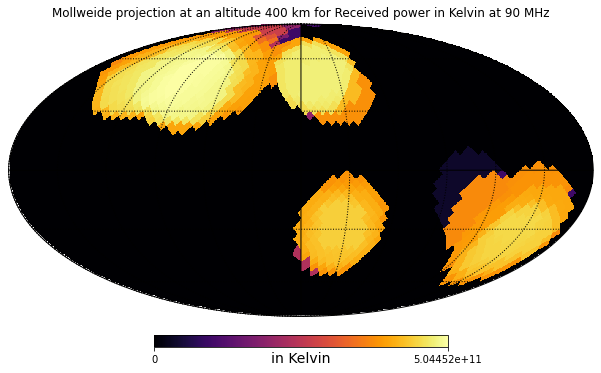

In [42]:
test_plot = np.zeros(hp.nside2npix(nside))
test_plot[0:np.size(power_output[0,:,32])] = power_output[0,:,32]
hp.mollview(test_plot,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 90 MHz",flip='geo',norm='hist')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

0.0 180.0 -180.0 180.0


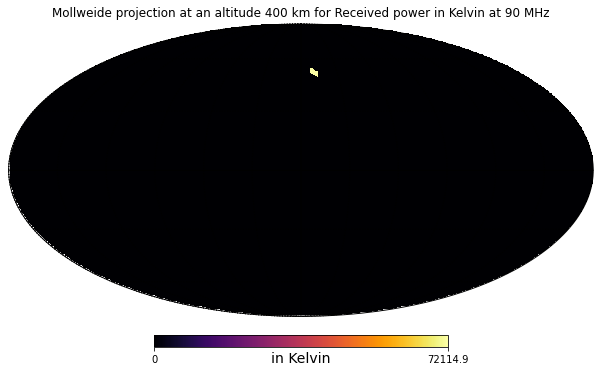

In [148]:
test_plot = np.zeros(hp.nside2npix(nside))
test_plot[0:np.size(power_output[1,:,40])] = power_output[1,:,40]
hp.mollview(test_plot,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 90 MHz",flip='geo',norm='hist')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

In [43]:
m = hp.ma(np.arange(hp.nside2npix(nside), dtype=np.double))
#mask = np.zeros(hp.nside2npix(NSIDE), dtype=np.bool)
#mask[pixel_theta > np.pi/2] = 1
#m.mask = mask
#hp.mollview(m)

0.0 180.0 -180.0 180.0


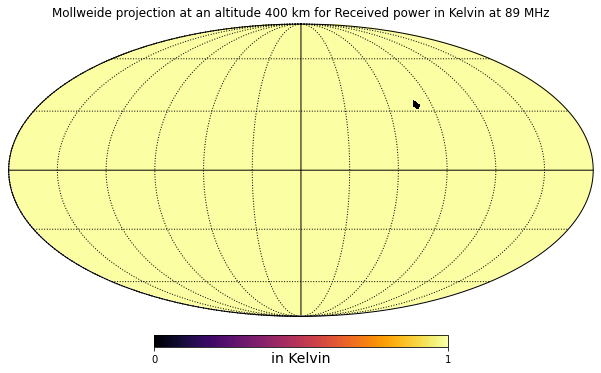

In [46]:
test_plot = np.zeros(hp.nside2npix(nside))
test_plot[0:np.size(power_output[0,:,40])] = power_output[0,:,40]
test_plot[arr!=686]=1
m.test_plot=test_plot
hp.mollview(test_plot,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 89 MHz",flip='geo',norm='hist')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

0.0 180.0 -180.0 180.0


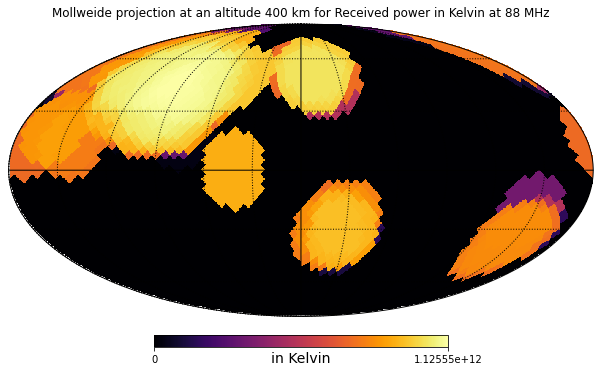

In [34]:
test_plot = np.zeros(hp.nside2npix(nside))
test_plot[0:np.size(power_output[0,:,28])] = power_output[0,:,28]
hp.mollview(test_plot,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 88 MHz",flip='geo',norm='hist')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

0.0 180.0 -180.0 180.0


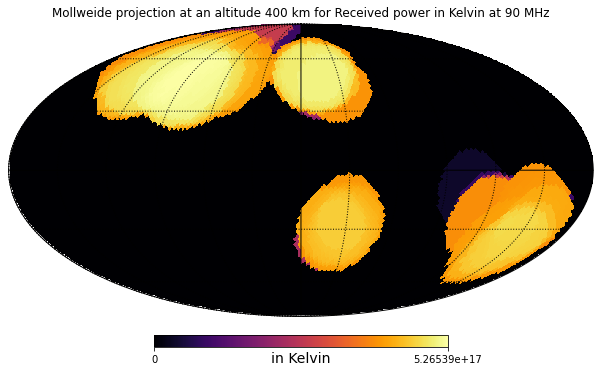

In [44]:
hp.mollview(test_plot,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 90 MHz",flip='geo',norm='hist')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

In [98]:
data=power_output[0,:,6]

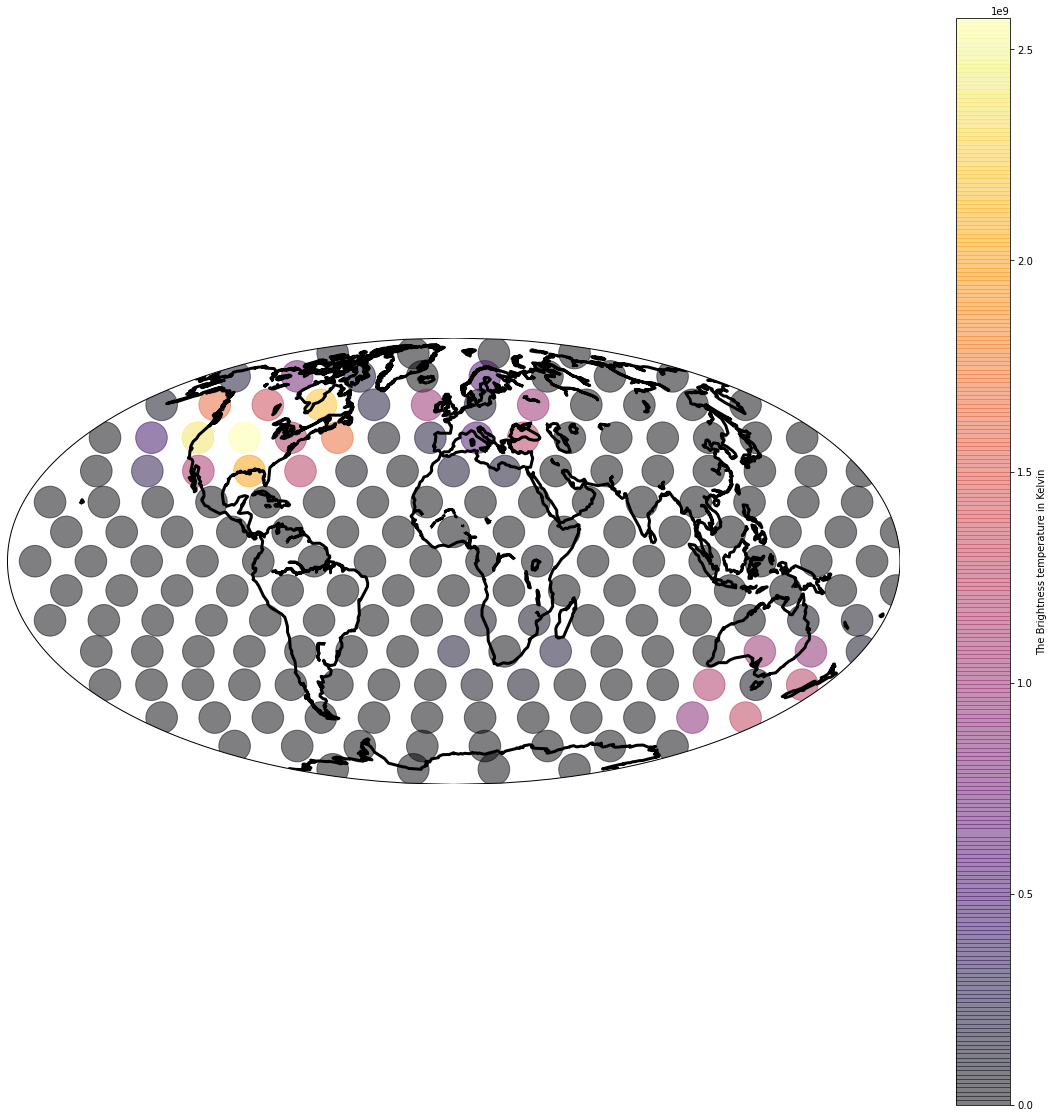

In [121]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.


plt.figure(figsize=(20,20))
m = Basemap(projection='moll',lon_0=0,resolution='c')
#x, y = m(phi,theta)

m.drawcoastlines(color='black', linewidth=3)
m.scatter(phi,theta, latlon=True,s=1000,c=data,
         cmap='inferno', alpha=0.5)
#m.pcolormesh(phi,theta,data,shading='flat',cmap=plt.cm.jet,latlon=True)
plt.colorbar(label=r'The Brightness temperature in Kelvin')
plt.show()

ValueError: s must be a scalar, or the same size as x and y

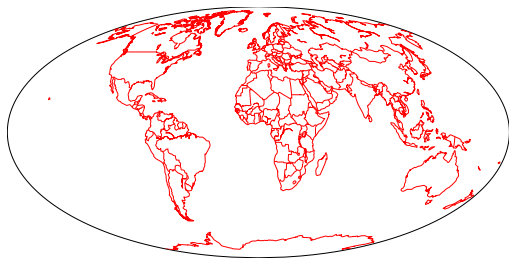

In [143]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.


plt.figure(figsize=(9,9))
m = Basemap(projection='moll',lon_0=0,resolution='c')
x, y = m(*np.meshgrid(phi,theta))


#test_plot0001 = np.zeros(hp.nside2npix(nside))
#test_plot0001[0:np.size(power_output[0,:,6])] = power_output[0,:,6]
#x=m(test_plot0001)
m.drawcoastlines(color='red', linewidth=1)
#m.shadedrelief()
m.drawcountries(color='red', linewidth=1)
m.scatter(x,y,data,latlon=True)
#m.scatter(x, y, latlon=True,c=data)
          #cmap='Reds', alpha=0.5)
#test_plot0001.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
#m.drawparallels(np.arange(-90.,120.,30.))
#m.drawmeridians(np.arange(0.,420.,60.))
#test_plot0001.drawmapboundary(fill_color='aqua')
#plt.title("Mollweide Projection")


In [125]:
from healpy.newvisufunc import projview, newprojplot

0.0 180.0 -180.0 180.0


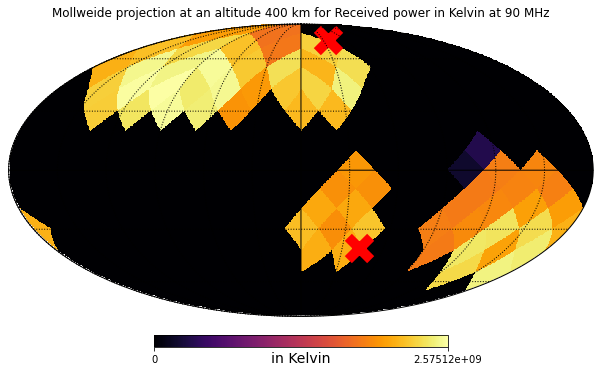

In [141]:
test_plot0001 = np.zeros(hp.nside2npix(nside))
test_plot0001[0:np.size(power_output[0,:,6])] = power_output[0,:,6]
hp.mollview(test_plot0001,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 90 MHz",flip='geo',norm='hist')#xsize=24)#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()
s = 500
plt.scatter(np.deg2rad(10.45), np.deg2rad(51.16), color="r", marker="x", linewidth=10, s=s);
plt.scatter(np.deg2rad(22.93), np.deg2rad(-30.559), color="r", marker="x", linewidth=10, s=s);
#plt.scatter(np.deg2rad(10), np.deg2rad(90), color="r", marker="x", linewidth=10, s=s);

#hp.boundaries()
#newprojplot(np.radians(df['Latitude in degrees'].to_numpy()), np.radians(df['Longitude in degrees'].to_numpy()))

In [122]:
from PIL import Image

def changeImageSize(maxWidth, 
                    maxHeight, 
                    image):
    
    widthRatio  = maxWidth/image.size[0]
    heightRatio = maxHeight/image.size[1]

    newWidth    = int(widthRatio*image.size[0])
    newHeight   = int(heightRatio*image.size[1])

    newImage    = image.resize((newWidth, newHeight))
    return newImage
  

img1 = Image.open(r"/home/ghoshsonia/rfi_RRI/400@94.png")
img2 = Image.open(r"/home/ghoshsonia/rfi_RRI/new_Earth.png")
  
# No transparency mask specified, 


image3 = changeImageSize(800, 500, img1)
image4 = changeImageSize(800, 500, img2)

# Make sure images got an alpha channel
image5 = image3.convert("RGBA")
image6 = image4.convert("RGBA")
#image5.show()
#image6.show()

# simulating an raster overlay
alphaBlended2 = Image.blend(image5, image6, alpha=.4)
  
alphaBlended2.show()

0.0 180.0 -180.0 180.0


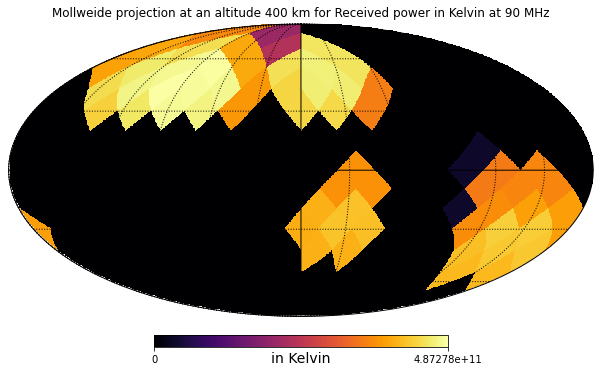

In [446]:
test_plot0001 = np.zeros(hp.nside2npix(nside))
test_plot0001[0:np.size(DIFF[0,:,6])] = DIFF[0,:,6]
hp.mollview(test_plot0001,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 90 MHz",flip='geo',norm='hist')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

0.0 180.0 -180.0 180.0


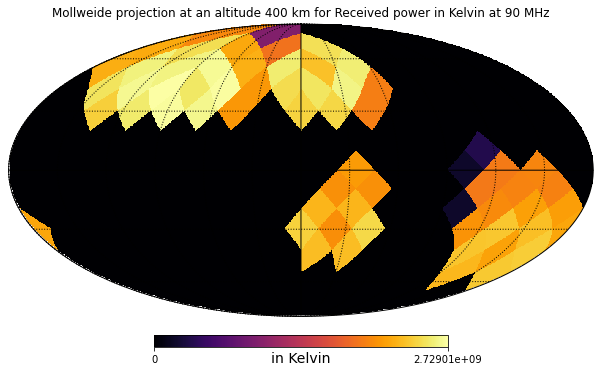

In [437]:
test_plot001 = np.zeros(hp.nside2npix(nside))
test_plot001[0:np.size(power_output1[0,:,6])] = power_output1[0,:,6]
hp.mollview(test_plot001,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 90 MHz",flip='geo',norm='hist')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

0.0 180.0 -180.0 180.0


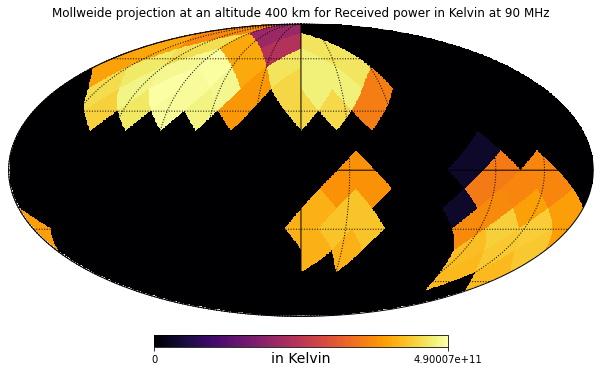

In [444]:
test_plot00 = np.zeros(hp.nside2npix(nside))
test_plot00[0:np.size(power_output[0,:,6])] = power_output[0,:,6]
hp.mollview(test_plot00,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 90 MHz",flip='geo',norm='hist')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

In [408]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 400 km at 90 MHz----------------------#######

test_plot = np.zeros(hp.nside2npix(nside))
test_plot[0:np.size(power_output[2,:,6])] = power_output[2,:,6]


0.0 180.0 -180.0 180.0


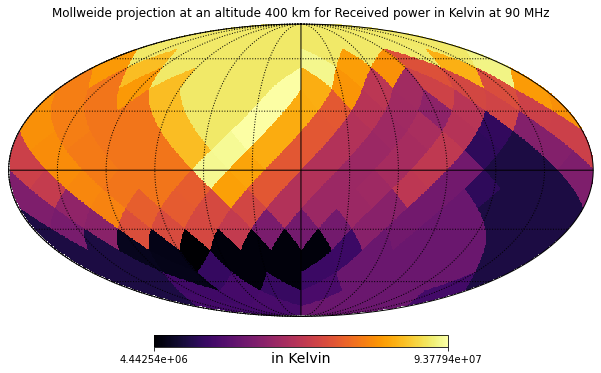

In [409]:
hp.mollview(test_plot,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 90 MHz",flip='geo',norm='hist')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

0.0 180.0 -180.0 180.0


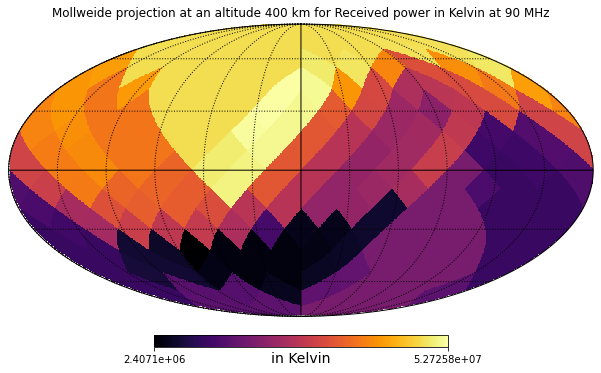

In [414]:
test_plot00 = np.zeros(hp.nside2npix(nside))
test_plot00[0:np.size(power_output[2,:,40])] = power_output[2,:,40]
hp.mollview(test_plot00,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 90 MHz",flip='geo',norm='hist')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()


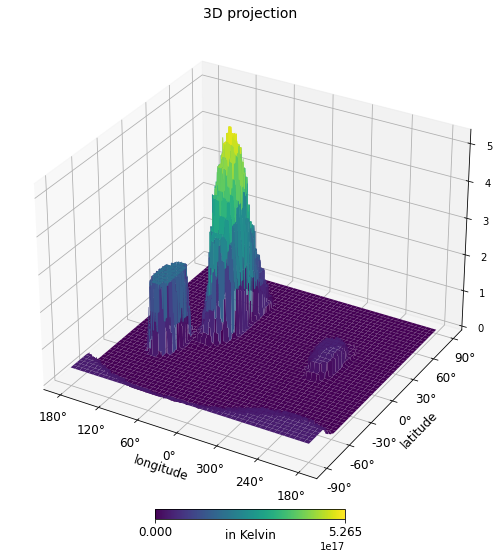

In [41]:
projview(
    test_plot,
    coord=["C","G"],
    hold=False,
    graticule=True,
    graticule_labels=True,
    unit="in Kelvin",
    xlabel="longitude",
    ylabel="latitude",
    cb_orientation="horizontal",
    projection_type="3d",
    title="3D projection",
    );

In [41]:
# Replacing the power value of 0 to a minimum value 1.000001 in order to apply logarithmic equalization in 
# the Healpy map


power_output_log=np.where(power_output[0,:,6]==0, 1.0000001, power_output[0,:,6])
power_output_log

array([1.0000001, 1.0000001, 26130887147600.1, ..., 1.0000001, 1.0000001,
       1.0000001], dtype=object)

array([ 0.        ,  0.        , 29.97784841, ...,  0.        ,
        0.        ,  0.        ])

In [42]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 400 km at 90 MHz with logarithmic equalization----------------------#######


test_plot12 = np.zeros(hp.nside2npix(nside))
test_plot12[0:np.size(power_output[0,:,6])] = power_output_log
test_plot12=np.where(test_plot12==0, 1.0000001,test_plot12 )

0.0 180.0 -180.0 180.0


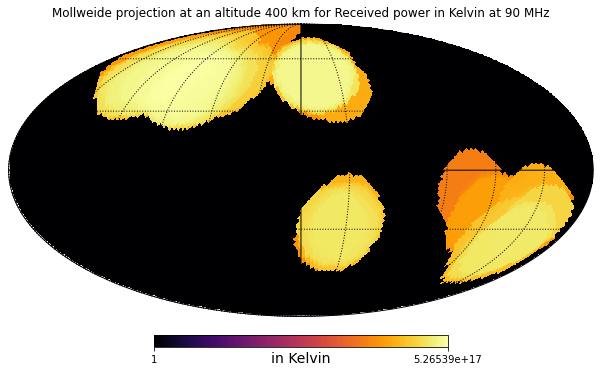

In [43]:
hp.mollview(test_plot12,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 90 MHz",flip='geo',norm="log")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

0.0 180.0 -180.0 180.0


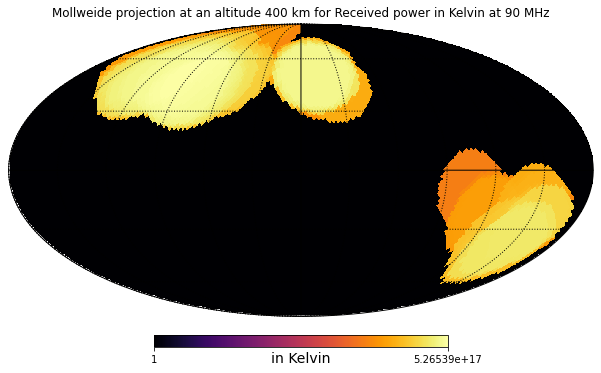

In [69]:
hp.mollview(test_plot12,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 90 MHz",flip='geo',norm="log")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

In [52]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 400 km at 100 MHz----------------------#######


test_plot1 = np.zeros(hp.nside2npix(nside))
test_plot1[0:np.size(power_output[0,:,26])] = power_output[0,:,26]


0.0 180.0 -180.0 180.0


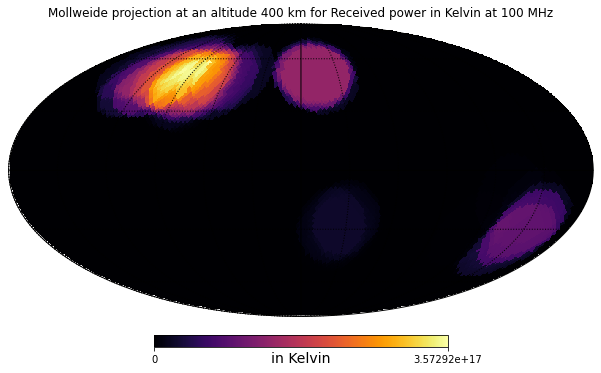

In [55]:
hp.mollview(test_plot1,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 100 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

0.0 180.0 -180.0 180.0


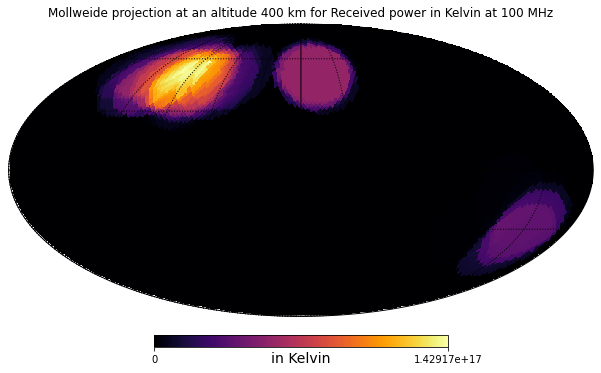

In [55]:
hp.mollview(test_plot1,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 400 km for Received power in Kelvin at 100 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

In [42]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 3794 km at 90 MHz----------------------#######


test_plot4 = np.zeros(hp.nside2npix(nside))
test_plot4[0:np.size(power_output[1,:,6])] = power_output[1,:,6]

0.0 180.0 -180.0 180.0


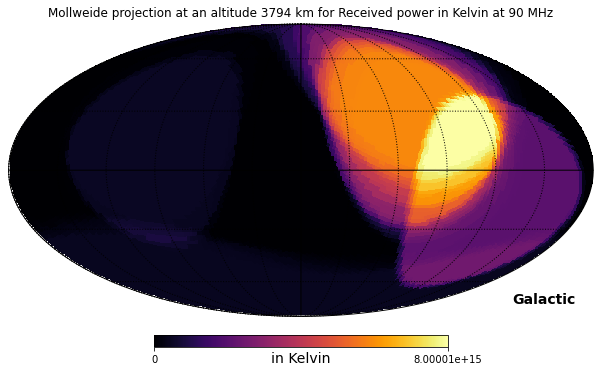

In [44]:
hp.mollview(test_plot4,coord=['C','G'],cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 3794 km for Received power in Kelvin at 90 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

0.0 180.0 -180.0 180.0


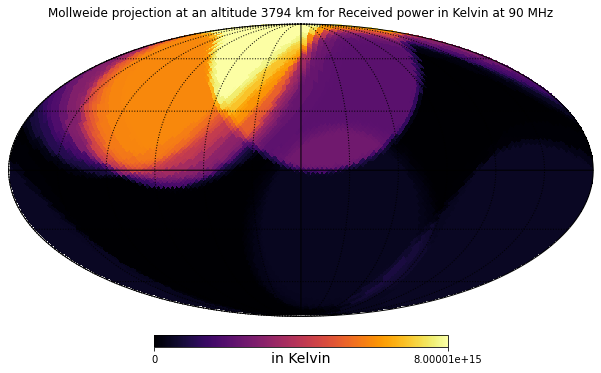

In [57]:
hp.mollview(test_plot4,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 3794 km for Received power in Kelvin at 90 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

0.0 180.0 -180.0 180.0


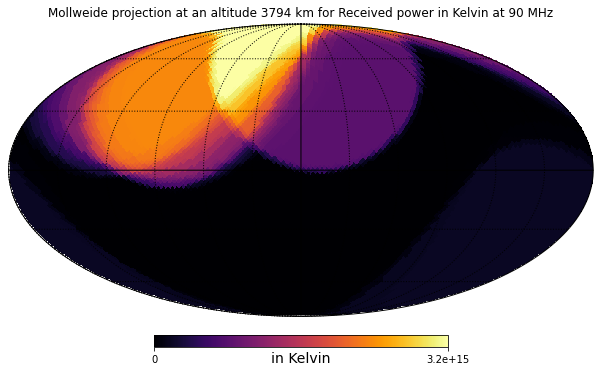

In [57]:
hp.mollview(test_plot4,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 3794 km for Received power in Kelvin at 90 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

In [58]:
# Replacing the power value of 0 to a minimum value 1.000001 in order to apply logarithmic equalization in 
# the Healpy map


power_output_log1=np.where(power_output[1,:,6]==0, 1.0000001, power_output[1,:,6])
np.shape(power_output_log1)

(12288,)

In [59]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 3794 km at 90 MHz with logarithmic equalization----------------------#######


test_plot13 = np.zeros(hp.nside2npix(nside))
test_plot13[0:np.size(power_output[1,:,6])] = power_output_log1
test_plot13=np.where(test_plot13==0, 1.0000001,test_plot13 )

0.0 180.0 -180.0 180.0


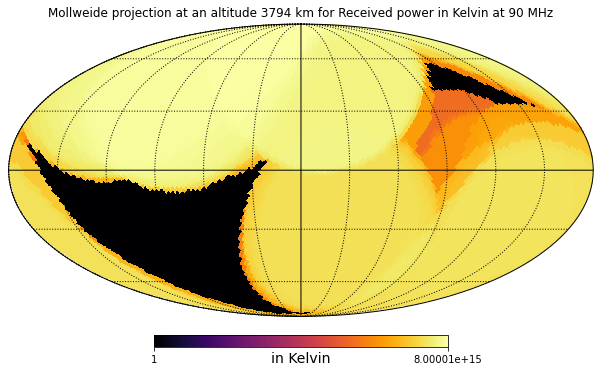

In [60]:
hp.mollview(test_plot13,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 3794 km for Received power in Kelvin at 90 MHz",flip='geo',norm="log")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

0.0 180.0 -180.0 180.0


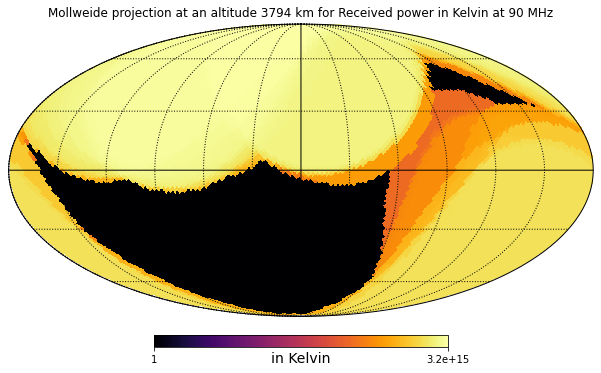

In [60]:
hp.mollview(test_plot13,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 3794 km for Received power in Kelvin at 90 MHz",flip='geo',norm="log")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

In [61]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 3794 km at 100 MHz----------------------#######


test_plot2 = np.zeros(hp.nside2npix(nside))
test_plot2[0:np.size(power_output[1,:,26])] = power_output[1,:,26]


0.0 180.0 -180.0 180.0


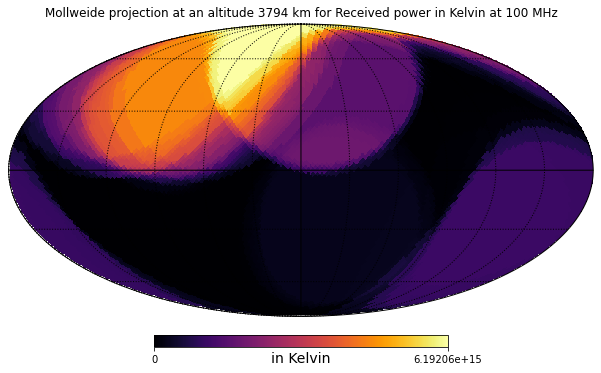

In [62]:
hp.mollview(test_plot2,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 3794 km for Received power in Kelvin at 100 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

0.0 180.0 -180.0 180.0


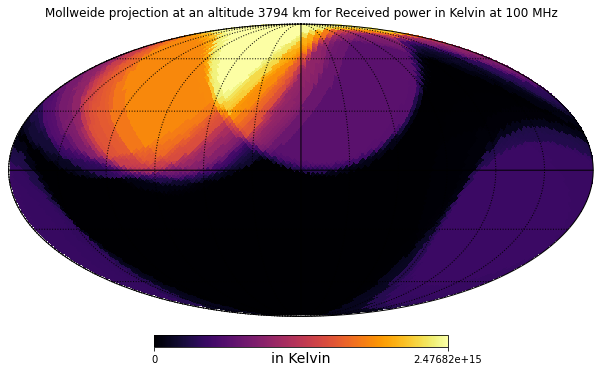

In [62]:
hp.mollview(test_plot2,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 3794 km for Received power in Kelvin at 100 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

In [63]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 36000 km at 90 MHz----------------------#######


test_plot5 = np.zeros(hp.nside2npix(nside))
test_plot5[0:np.size(power_output[2,:,6])] = power_output[2,:,6]

0.0 180.0 -180.0 180.0


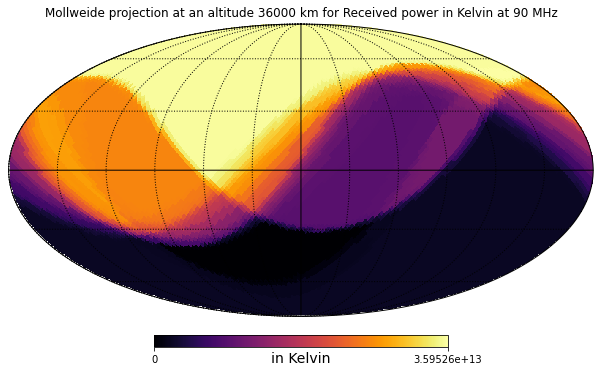

In [64]:
hp.mollview(test_plot5,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 36000 km for Received power in Kelvin at 90 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

In [65]:
# Replacing the power value of 0 to a minimum value 1.000001 in order to apply logarithmic equalization in 
# the Healpy map


power_output_log2=np.where(power_output[2,:,6]==0, 1.0000001, power_output[2,:,6])
np.shape(power_output_log2)

(12288,)

In [66]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 36000 km at 90 MHz with logarithmic equalization----------------------#######


test_plot14 = np.zeros(hp.nside2npix(nside))
test_plot14[0:np.size(power_output[2,:,6])] = power_output_log2
test_plot14=np.where(test_plot14==0, 1.0000001,test_plot14 )

0.0 180.0 -180.0 180.0


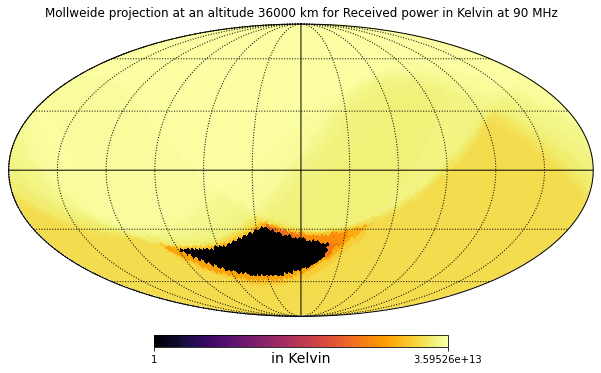

In [67]:
hp.mollview(test_plot14,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 36000 km for Received power in Kelvin at 90 MHz",flip='geo',norm="log")#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

In [63]:
###-------Plotting of the Healpy Map in mollweide projection------###
#####------For an altitude of 36000 km at 100 MHz----------------------#######


test_plot3 = np.zeros(hp.nside2npix(nside))
test_plot3[0:np.size(power_output[2,:,26])] = power_output[2,:,26]


0.0 180.0 -180.0 180.0


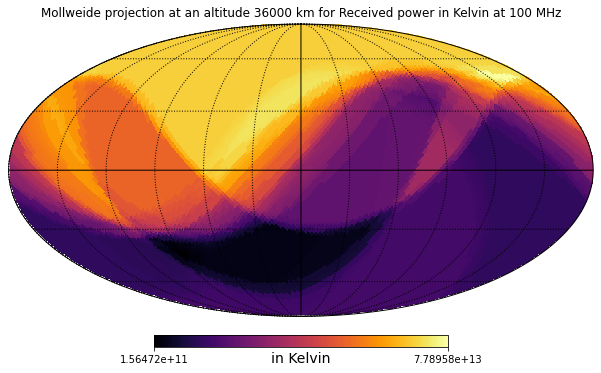

In [64]:
hp.mollview(test_plot3,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 36000 km for Received power in Kelvin at 100 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

0.0 180.0 -180.0 180.0


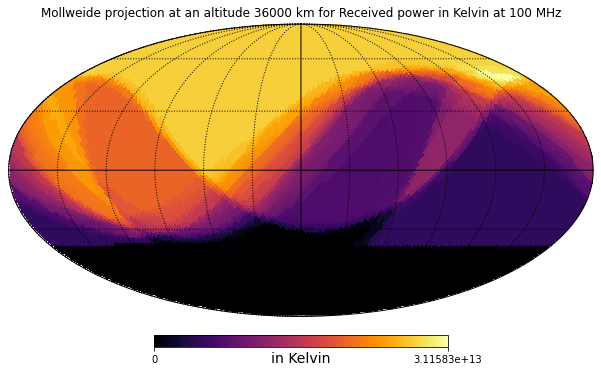

In [62]:
hp.mollview(test_plot3,cmap='inferno',unit="in Kelvin",title="Mollweide projection at an altitude 36000 km for Received power in Kelvin at 100 MHz",flip='geo')#,cb_orientation="vertical",title="Mollweide projection for Received power in Kelvin at 88.9MHz",flip='g')
hp.graticule()

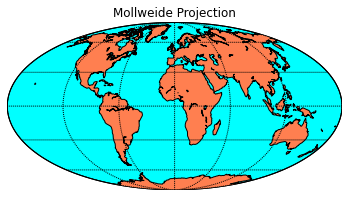

In [30]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='moll',lon_0=0,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Mollweide Projection")
plt.show()